In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

To create a decision tree for identifying patients with diabetes based on the given dataset, you can follow these steps:

1. Import the necessary libraries: You'll need libraries such as pandas, scikit-learn, and matplotlib to load the dataset, build the decision tree model, and visualize the tree.

2. Load the dataset: Use the pandas library to read the "diabetes.csv" file and create a DataFrame.

3. Split the data: Separate the features (independent variables) from the target variable. Assign the features to a variable, let's say `X`, and the target variable (Outcome) to a variable, let's say `y`.

4. Preprocess the data: If necessary, perform any preprocessing steps such as handling missing values, scaling, or encoding categorical variables. For example, you can handle missing values by imputing them with mean or median values.

5. Split the data into training and testing sets: Use the `train_test_split` function from scikit-learn to divide the data into training and testing sets. This will allow you to train the decision tree model on the training set and evaluate its performance on the testing set.

6. Create and train the decision tree model: Use the `DecisionTreeClassifier` class from scikit-learn to create an instance of the decision tree classifier. Fit the model to the training data using the `fit` method.

7. Make predictions: Use the trained model to make predictions on the testing set using the `predict` method.

8. Evaluate the model: Calculate evaluation metrics such as accuracy, precision, recall, and F1 score to assess the performance of the model. You can use the confusion matrix and classification report from scikit-learn to obtain these metrics.

9. Visualize the decision tree: If desired, you can visualize the decision tree using the `plot_tree` function from scikit-learn or other visualization libraries like Graphviz or Matplotlib.

By following these steps, you can build a decision tree model to identify patients with diabetes based on the given clinical variables. Remember to adjust the hyperparameters of the decision tree model, such as the maximum depth or minimum samples per leaf, to optimize its performance and prevent overfitting.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

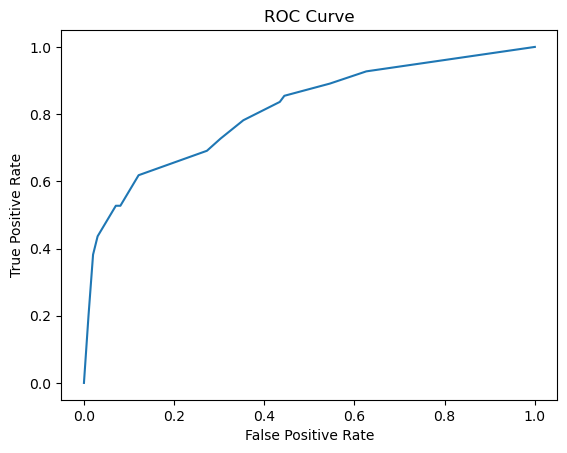

AUC Score: 0.8104683195592287


In [10]:
# Step 1: Import the dataset and examine the variables
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(download_url)

# Display the first few rows of the dataset
print(df.head())

# Display descriptive statistics of the variables
print(df.describe())

# Step 2: Preprocess the data
# Clean missing values
df = df.dropna()

# Remove outliers (if necessary)

# Transform categorical variables into dummy variables (if necessary)
# (Not applicable in this dataset as all variables are numeric)

# Step 3: Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters
dt_classifier = DecisionTreeClassifier(**best_params)
dt_classifier.fit(X_train, y_train)

# Step 5: Evaluate the performance of the decision tree model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the ROC curve
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# Step 6: Interpret the decision tree
# You can visualize the decision tree
